In [26]:
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

Get Cheatsheet:

from https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing


In [27]:
df=pd.read_csv("all.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'],
)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


##Vectorization

The python numerical stack is based on a concept called vectorization. You have seen this in spreadsheets where you manipulate an entire column.

Whats the idea? It is that cpu's have some ability to carry out multiple things at one time, and we should use it to increase speed. But its also something else: there is a simplicity of notation. For example, see the following

In [28]:
a=[1,2,3,4,5]
b=[1,2,3,4,5]
print type(a)
print "============="
for index,aitem in enumerate(a):
    print a[index]*b[index]

<type 'list'>
1
4
9
16
25


In [29]:
a=np.array([1,2,3,4,5])
print type(a)
b=np.array([1,2,3,4,5])

print a*b

<type 'numpy.ndarray'>
[ 1  4  9 16 25]


In [30]:
a+1

array([2, 3, 4, 5, 6])

##Pandas

In [31]:
df=pd.read_csv("all.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'],
)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


Notice we have a table! A spreadsheet! And it indexed the rows. Lets see the types of the columns...

![](files/pandastruct.png)

In [32]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [33]:
df.shape

(6000, 10)

In [34]:
df.columns

Index([u'rating', u'review_count', u'isbn', u'booktype', u'author_url', u'year', u'genre_urls', u'dir', u'rating_count', u'name'], dtype='object')

In [35]:
type(df.rating), type(df)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [36]:
100*np.mean(df.rating < 3.0)

0.066666666666666666

In [37]:
df.query("rating > 4.5")

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
17,4.58,1314,0345538374,good_reads:book,https://www.goodreads.com/author/show/656983.J...,1973,/genres/fantasy|/genres/classics|/genres/scien...,dir01/30.J_R_R_Tolkien_4_Book_Boxed_Set.html,68495,J.R.R. Tolkien 4-Book Boxed Set
162,4.55,15777,075640407X,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2007,/genres/fantasy|/genres/fiction,dir02/186074.The_Name_of_the_Wind.html,210018,The Name of the Wind (The Kingkiller Chronicle...
222,4.53,15256,055357342X,good_reads:book,https://www.goodreads.com/author/show/346732.G...,2000,/genres/fantasy|/genres/fiction|/genres/fantas...,dir03/62291.A_Storm_of_Swords.html,327992,"A Storm of Swords (A Song of Ice and Fire, #3)"
242,4.53,5404,0545265355,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2010,/genres/young-adult|/genres/fiction|/genres/fa...,dir03/7938275-the-hunger-games-trilogy-boxset....,102330,The Hunger Games Trilogy Boxset (The Hunger Ga...
249,4.80,644,0740748475,good_reads:book,https://www.goodreads.com/author/show/13778.Bi...,2005,/genres/sequential-art|/genres/comics|/genres/...,dir03/24812.The_Complete_Calvin_and_Hobbes.html,22674,The Complete Calvin and Hobbes
284,4.58,15195,1406321346,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2013,/genres/fantasy|/genres/young-adult|/genres/fa...,dir03/18335634-clockwork-princess.html,130161,"Clockwork Princess (The Infernal Devices, #3)"
304,4.54,572,0140259449,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1933,/genres/classics|/genres/fiction|/genres/roman...,dir04/14905.The_Complete_Novels.html,17539,The Complete Novels
386,4.55,8820,0756404738,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2011,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir04/1215032.The_Wise_Man_s_Fear.html,142499,"The Wise Man's Fear (The Kingkiller Chronicle,..."
400,4.53,9292,1423140605,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2012,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/12127750-the-mark-of-athena.html,128412,"The Mark of Athena (The Heroes of Olympus, #3)"
475,4.57,824,1416997857,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2009,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/6485421-the-mortal-instruments-boxed-set...,39720,The Mortal Instruments Boxed Set (The Mortal I...


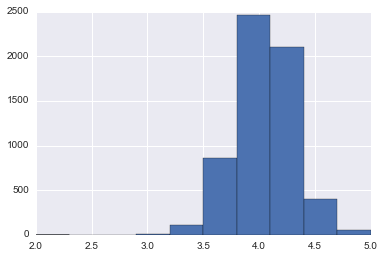

In [38]:
df.rating.hist();

4.04220073358 4.04220073358 4.05


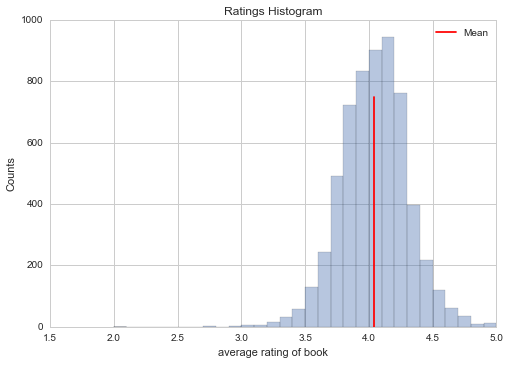

In [39]:
sns.set_context("notebook")
meanrat=df.rating.mean()
print meanrat, np.mean(df.rating), df.rating.median()
with sns.axes_style("whitegrid"):
    df.rating.hist(bins=30, alpha=0.4);
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel("average rating of book")
    plt.ylabel("Counts")
    plt.title("Ratings Histogram")
    plt.legend()
    #sns.despine()

In [40]:
df = df[df.year.notnull()]
df.shape

(5993, 10)

In [41]:
df.rating_count=df.rating_count.astype(int)
df.review_count=df.review_count.astype(int)
df.year=df.year.astype(int)

In [42]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

In [43]:
df[df.genre_urls.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
953,4.56,27,1477276068,good_reads:book,https://www.goodreads.com/author/show/6621980....,2012,NaN,dir10/16243767-crossing-the-seas.html,90,Crossing the Seas
1515,4.56,8,NaN,good_reads:book,https://www.goodreads.com/author/show/394525.T...,2013,NaN,dir16/18136407-crashing-down-to-earth.html,75,Crashing Down to Earth
1693,4.21,7,NaN,good_reads:book,https://www.goodreads.com/author/show/3110785._,2009,NaN,dir17/7425765.html,67,Ð¡Ð»ÑÐ½ÑÐµ Ð½ÐµÐ´Ð¾ÑÐµÐ³Ð°ÐµÐ¼Ð¾
1752,3.85,41,140921818X,good_reads:book,https://www.goodreads.com/author/show/7337562....,13,NaN,dir18/5548850-the-day-jesus-rode-into-croydon....,94,The Day Jesus Rode Into Croydon
1942,4.66,8,0992382009,good_reads:book,https://www.goodreads.com/author/show/7574275....,2014,NaN,dir20/19532388-letters-from-your-soul.html,29,Letters from your soul
2034,4.92,2,147930414X,good_reads:book,https://www.goodreads.com/author/show/6467808....,2012,NaN,dir21/20363899-happy-halloween.html,49,Happy Halloween
2067,4.16,24,0804844399,good_reads:book,https://www.goodreads.com/author/show/6894841....,2012,NaN,dir21/18343754-a-capitalist-in-north-korea.html,57,A Capitalist in North Korea
2145,5.00,3,1300589469,good_reads:book,https://www.goodreads.com/author/show/6906561....,2012,NaN,dir22/17287259-a-book-about-absolutely-nothing...,63,A Book About Absolutely Nothing.
2170,4.65,12,NaN,good_reads:book,https://www.goodreads.com/author/show/6565853....,2012,NaN,dir22/17904495-curse-of-the-salute.html,31,Curse of The Salute
2190,4.33,31,0987434853,good_reads:book,https://www.goodreads.com/author/show/4443219....,2013,NaN,dir22/18251020-life-song.html,40,Life Song


In [44]:
df[df.genre_urls.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
953,4.56,27,1477276068,good_reads:book,https://www.goodreads.com/author/show/6621980....,2012,NaN,dir10/16243767-crossing-the-seas.html,90,Crossing the Seas
1515,4.56,8,NaN,good_reads:book,https://www.goodreads.com/author/show/394525.T...,2013,NaN,dir16/18136407-crashing-down-to-earth.html,75,Crashing Down to Earth
1693,4.21,7,NaN,good_reads:book,https://www.goodreads.com/author/show/3110785._,2009,NaN,dir17/7425765.html,67,Ð¡Ð»ÑÐ½ÑÐµ Ð½ÐµÐ´Ð¾ÑÐµÐ³Ð°ÐµÐ¼Ð¾
1752,3.85,41,140921818X,good_reads:book,https://www.goodreads.com/author/show/7337562....,13,NaN,dir18/5548850-the-day-jesus-rode-into-croydon....,94,The Day Jesus Rode Into Croydon
1942,4.66,8,0992382009,good_reads:book,https://www.goodreads.com/author/show/7574275....,2014,NaN,dir20/19532388-letters-from-your-soul.html,29,Letters from your soul
2034,4.92,2,147930414X,good_reads:book,https://www.goodreads.com/author/show/6467808....,2012,NaN,dir21/20363899-happy-halloween.html,49,Happy Halloween
2067,4.16,24,0804844399,good_reads:book,https://www.goodreads.com/author/show/6894841....,2012,NaN,dir21/18343754-a-capitalist-in-north-korea.html,57,A Capitalist in North Korea
2145,5.00,3,1300589469,good_reads:book,https://www.goodreads.com/author/show/6906561....,2012,NaN,dir22/17287259-a-book-about-absolutely-nothing...,63,A Book About Absolutely Nothing.
2170,4.65,12,NaN,good_reads:book,https://www.goodreads.com/author/show/6565853....,2012,NaN,dir22/17904495-curse-of-the-salute.html,31,Curse of The Salute
2190,4.33,31,0987434853,good_reads:book,https://www.goodreads.com/author/show/4443219....,2013,NaN,dir22/18251020-life-song.html,40,Life Song


In [45]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

In [46]:
df['author']=df.author_url.map(lambda x: ".".join(x.split('/')[-1].split('.')[1:]))
df['booktype']=df.booktype.map(lambda x: x.split(':')[-1])

In [47]:
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author
0,4.40,136455,0439023483,book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins
1,4.41,16648,0439358078,book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling
2,3.56,85746,0316015849,book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer
3,4.23,47906,0061120081,book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee
4,4.23,34772,0679783261,book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen


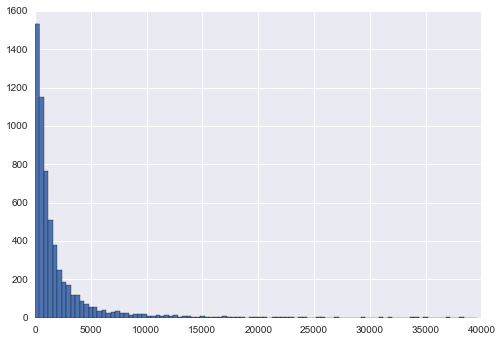

In [48]:
df.review_count.hist(bins=np.arange(0, 40000, 400))

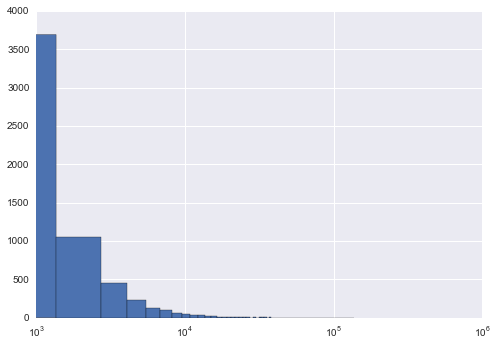

In [49]:
df.review_count.hist(bins=100)
plt.xscale("log");

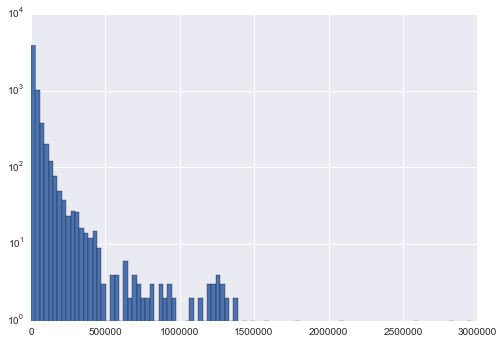

In [50]:
df.rating_count.hist(bins=100, log=True)

In [51]:
df[df.year < 0]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author
47,3.68,5785,0143039954,book,https://www.goodreads.com/author/show/903.Homer,-800,/genres/classics|/genres/fiction|/genres/poetr...,dir01/1381.The_Odyssey.html,560248,The Odyssey,Homer
246,4.01,365,0147712556,book,https://www.goodreads.com/author/show/903.Homer,-800,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey,Homer
455,3.85,1499,0140449140,book,https://www.goodreads.com/author/show/879.Plato,-380,/genres/philosophy|/genres/classics|/genres/no...,dir05/30289.The_Republic.html,82022,The Republic,Plato
596,3.77,1240,0679729526,book,https://www.goodreads.com/author/show/919.Virgil,-29,/genres/classics|/genres/poetry|/genres/fictio...,dir06/12914.The_Aeneid.html,60308,The Aeneid,Virgil
629,3.64,1231,1580495931,book,https://www.goodreads.com/author/show/1002.Sop...,-429,/genres/classics|/genres/plays|/genres/drama|/...,dir07/1554.Oedipus_Rex.html,93192,Oedipus Rex,Sophocles
674,3.92,3559,1590302257,book,https://www.goodreads.com/author/show/1771.Sun...,-512,/genres/non-fiction|/genres/politics|/genres/c...,dir07/10534.The_Art_of_War.html,114619,The Art of War,Sun_Tzu
746,4.06,1087,0140449183,book,https://www.goodreads.com/author/show/5158478....,-500,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita,Anonymous
777,3.52,1038,1580493882,book,https://www.goodreads.com/author/show/1002.Sop...,-442,/genres/drama|/genres/fiction|/genres/classics...,dir08/7728.Antigone.html,49084,Antigone,Sophocles
1233,3.94,704,015602764X,book,https://www.goodreads.com/author/show/1002.Sop...,-400,/genres/classics|/genres/plays|/genres/drama|/...,dir13/1540.The_Oedipus_Cycle.html,36008,The Oedipus Cycle,Sophocles
1397,4.03,890,0192840509,book,https://www.goodreads.com/author/show/12452.Aesop,-560,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables,Aesop


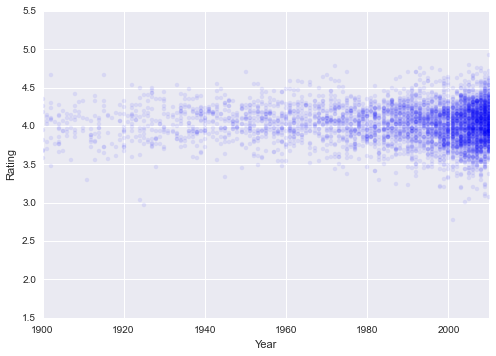

In [52]:
plt.scatter(df.year, df.rating, lw=0, alpha=.08)
plt.xlim([1900,2010])
plt.xlabel("Year")
plt.ylabel("Rating")

In [53]:
for year, subset in df.groupby('year'):
    print year, subset[subset.rating == subset.rating.max()].name.values

-1500 ['The Epic of Gilgamesh']
-800 ['The Iliad/The Odyssey']
-560 ["Aesop's Fables"]
-512 ['The Art of War']
-500 ['The Bhagavad Gita']
-458 ['The Oresteia']
-442 ['Antigone']
-440 ['The Histories']
-431 ['Medea']
-429 ['Oedipus Rex']
-411 ['The History of the Peloponnesian War']
-400 ['Complete Works']
-390 ['Apology']
-380 ['The Republic']
-370 ['The Symposium']
-360 ['Five Dialogues']
-350 ['The Nicomachean Ethics']
-29 ['The Aeneid']
4 ['The Seven Spiritual Laws of Success']
8 ['Metamorphoses']
13 ['The Day Jesus Rode Into Croydon']
100 ['The New Oxford Annotated Bible, New Revised Standard Version']
121 ['The Twelve Caesars']
130 ['Holy Bible']
158 ['The Golden Ass']
174 ['Meditations']
200 ['The Garden of Eden']
201 ['Fe Fi FOE Comes']
213 ['Na\xc3\x83\xc2\xafve. Super']
397 ['Confessions']
632 ['The Quran']
800 ['Beowulf']
900 ['The Arabian Nights']
968 ['La B\xc3\x83\xc2\xaate humaine (Les Rougon-Macquart, #17)']
1002 ['The Pillow Book']
1008 ['The Tale of Genji']
1010 ['Shah

In [59]:
decade =  (df.year // 10) * 10
print type(decade)
decade

<class 'pandas.core.series.Series'>


0       2000
1       2000
2       2000
3       1960
4       1810
5       1930
6       1940
7       1960
8       1940
9       1970
10      1990
11      2000
12      2000
13      1860
14      1590
15      1860
16      2000
17      1970
18      1950
19      1980
20      1890
21      1860
22      1950
23      1900
24      1980
25      1950
26      2010
27      1930
28      1960
29      1890
        ... 
5970    1980
5971    2000
5972    2010
5973    2010
5974    2010
5975    2010
5976    2010
5977    1980
5978    2000
5979    2000
5980    1970
5981    2000
5982    2000
5983    1970
5984    2000
5985    2000
5986    2010
5987    1940
5988    1970
5989    2010
5990    1980
5991    2000
5992    2000
5993    2010
5994    2000
5995    2000
5996    2000
5997    2010
5998    2000
5999    2000
Name: year, dtype: int64

In [60]:
bydecade_df = df[['name', 'year']]
bydecade_df['decade'] = decade

decade_ratings = df.groupby(decade).rating
decade_mean=decade_ratings.mean()
decade_mean.name = 'Decade Mean'
print decade_mean

year
-1500    3.600000
-800     3.845000
-560     4.030000
-520     3.920000
-500     4.060000
-460     3.960000
-450     3.520000
-440     3.870000
-430     3.640000
-420     3.830000
-400     4.086667
-390     4.110000
-380     3.850000
-370     3.990000
-360     4.070000
-350     3.880000
-30      3.770000
 0       4.025000
 10      3.850000
 100     4.300000
 120     4.020000
 130     4.450000
 150     3.880000
 170     4.160000
 200     4.060000
 210     3.900000
 390     3.820000
 630     4.370000
 800     3.380000
 900     4.040000
           ...   
 1710    3.620000
 1720    3.666667
 1740    3.500000
 1750    3.740000
 1760    3.760000
 1770    3.880000
 1780    4.092500
 1790    3.953333
 1800    3.850000
 1810    3.952000
 1820    3.954000
 1830    4.039444
 1840    3.949615
 1850    3.894231
 1860    3.981481
 1870    4.014400
 1880    3.956053
 1890    3.935946
 1900    4.005246
 1910    3.962549
 1920    4.008222
 1930    4.059375
 1940    4.061360
 1950    4.047135
 1960

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [61]:
decade_std=decade_ratings.std()

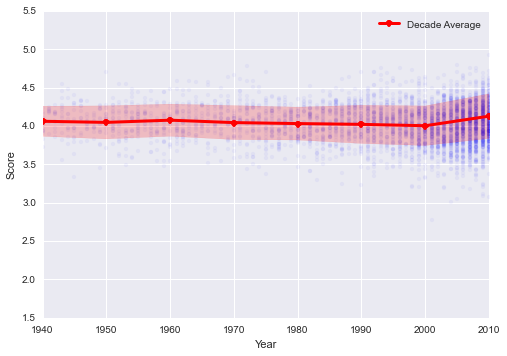

In [62]:
plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.scatter(df.year, df.rating, alpha=.04, lw=0)
plt.fill_between(decade_mean.index, (decade_mean + decade_std).values,
                 (decade_mean - decade_std).values, color='r', alpha=.2)
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend()
plt.xlim([1940, 2010]);

In [63]:
df.to_csv("cleaned2.csv", index=False)